<a href="https://colab.research.google.com/github/oracky/WMM-face-detection/blob/main/face_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza obrazu - detekcja twarzy

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import dlib

## Inicjalizacja - pobranie obrazu testowego i modeli dla detektorów twarzy

In [ ]:
# https://drive.google.com/file/d/1gn7itC80mnmp9TSK8PHMEZSKMOuBVUEQ/view?usp=sharing
!gdown --id 1gn7itC80mnmp9TSK8PHMEZSKMOuBVUEQ

Downloading...
From: https://drive.google.com/uc?id=1gn7itC80mnmp9TSK8PHMEZSKMOuBVUEQ
To: /content/2_Demonstration_Demonstration_Or_Protest_2_1.jpg
100% 147k/147k [00:00<00:00, 57.7MB/s]


In [ ]:
# https://drive.google.com/file/d/1UoFK0Jl7tY1z0ykdlvaxkFmyUR8lmLul/view?usp=sharing

!gdown --id 1UoFK0Jl7tY1z0ykdlvaxkFmyUR8lmLul

Downloading...
From: https://drive.google.com/uc?id=1UoFK0Jl7tY1z0ykdlvaxkFmyUR8lmLul
To: /content/haarcascade_frontalface_default.xml
100% 930k/930k [00:00<00:00, 59.7MB/s]


In [ ]:
# https://drive.google.com/file/d/1tb4P8NEcwTnja182AFDDnXM5ijTNQwj_/view?usp=sharing
!gdown --id 1tb4P8NEcwTnja182AFDDnXM5ijTNQwj_

Downloading...
From: https://drive.google.com/uc?id=1tb4P8NEcwTnja182AFDDnXM5ijTNQwj_
To: /content/mmod_human_face_detector.dat
100% 730k/730k [00:00<00:00, 48.5MB/s]


### Weryfikacja pobranych danych

In [ ]:
# 0f8c44e5e564e71d95bb3f5247ebae20  2_Demonstration_Demonstration_Or_Protest_2_1.jpg
!md5sum 2_Demonstration_Demonstration_Or_Protest_2_1.jpg

0f8c44e5e564e71d95bb3f5247ebae20  2_Demonstration_Demonstration_Or_Protest_2_1.jpg


In [ ]:
# a03f92a797e309e76e6a034ab9e02616  haarcascade_frontalface_default.xml
!md5sum haarcascade_frontalface_default.xml

a03f92a797e309e76e6a034ab9e02616  haarcascade_frontalface_default.xml


In [ ]:
# 2ac022385c5a56f8313ca9827ff76c3d  mmod_human_face_detector.dat
!md5sum mmod_human_face_detector.dat

2ac022385c5a56f8313ca9827ff76c3d  mmod_human_face_detector.dat


## Obraz testowy

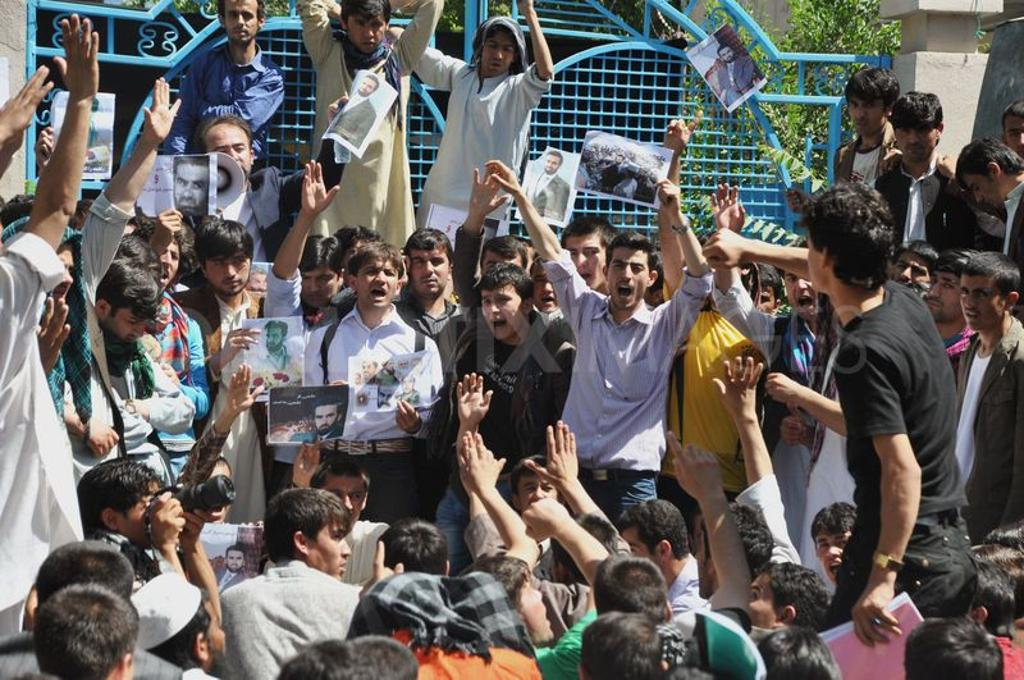

In [ ]:
img = cv2.imread("2_Demonstration_Demonstration_Or_Protest_2_1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2_imshow(img)

## Kaskada Haara

Opracowano na podstawie: https://www.pyimagesearch.com/2021/04/05/opencv-face-detection-with-haar-cascades/

In [ ]:
haar_detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

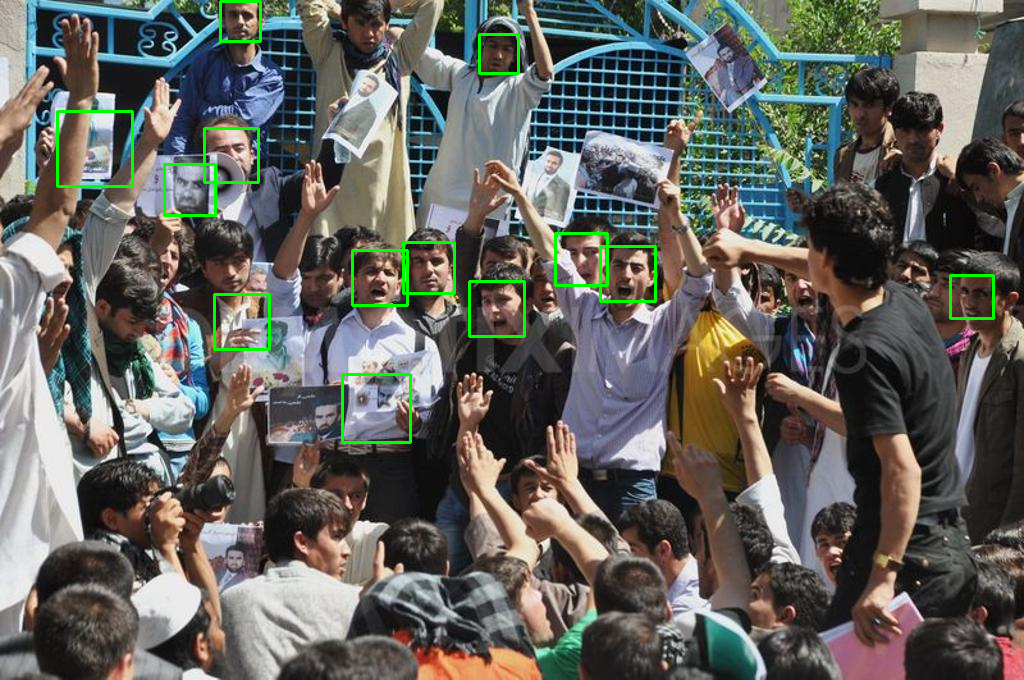

In [ ]:
rects = haar_detector.detectMultiScale(gray, scaleFactor=1.05,
	                                minNeighbors=5, minSize=(30, 30),
	                                flags=cv2.CASCADE_SCALE_IMAGE)

img_haar = img.copy()
for (x, y, w, h) in rects:
  cv2.rectangle(img_haar, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(img_haar)


## Histogram zorientowanych gradientów (HOG) z maszyną wektorów nośnych (SVM)

Opracowano na podstawie: https://www.pyimagesearch.com/2021/04/19/face-detection-with-dlib-hog-and-cnn/

In [ ]:
hog_svm_detector = dlib.get_frontal_face_detector()

In [ ]:
hog_svm_rects = hog_svm_detector(rgb, 1)

In [ ]:
def convert_and_trim_bb(image, rect):
	# extract the starting and ending (x, y)-coordinates of the
	# bounding box
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()
	# ensure the bounding box coordinates fall within the spatial
	# dimensions of the image
	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])
	# compute the width and height of the bounding box
	w = endX - startX
	h = endY - startY
	# return our bounding box coordinates
	return (startX, startY, w, h)

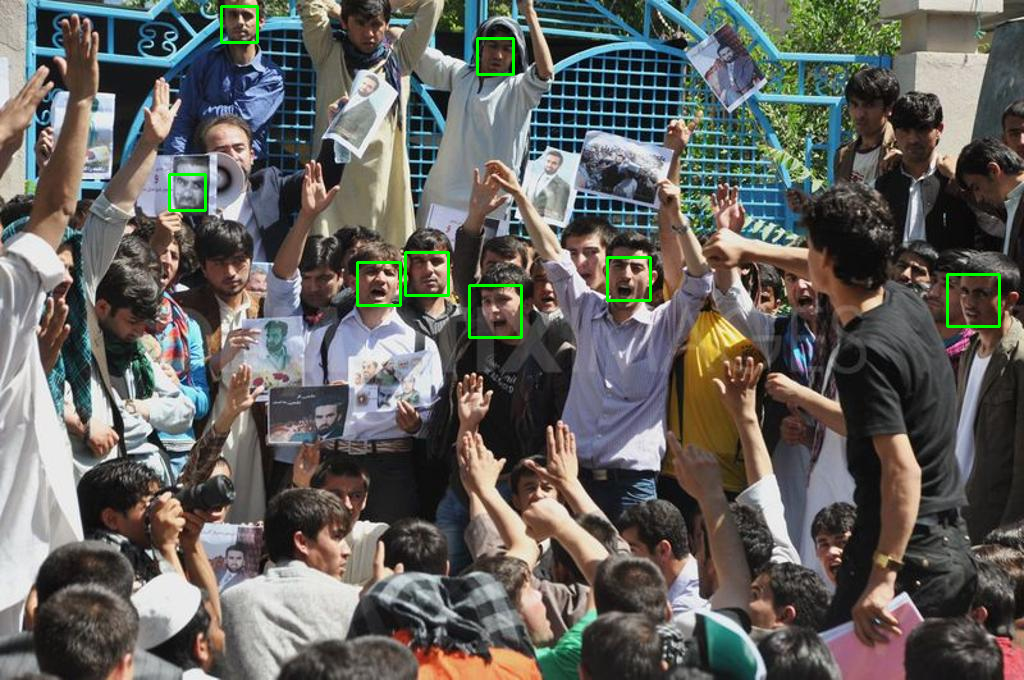

In [ ]:
hog_svm_boxes = [convert_and_trim_bb(img, r) for r in hog_svm_rects]

img_hog_svm = img.copy()
for (x, y, w, h) in hog_svm_boxes:
	cv2.rectangle(img_hog_svm, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
cv2_imshow(img_hog_svm)

## Splotowa sieć neuronowa (CNN)

Opracowano na podstawie: https://www.pyimagesearch.com/2021/04/19/face-detection-with-dlib-hog-and-cnn/

In [ ]:
cnn_detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')

In [ ]:
cnn_rects = cnn_detector(rgb, 1)

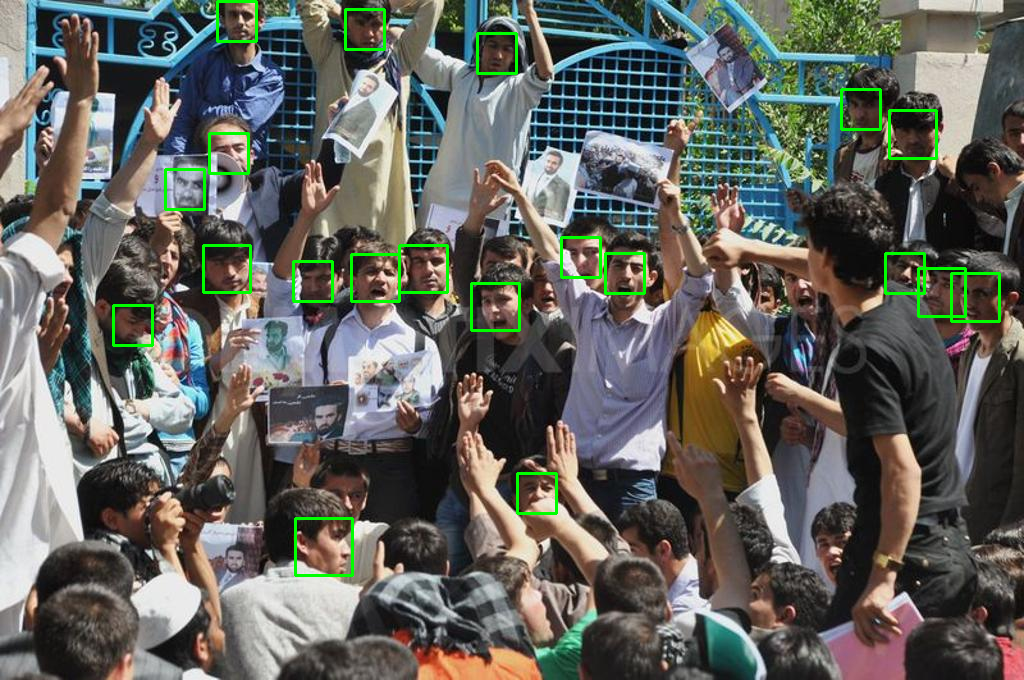

In [ ]:
cnn_boxes = [convert_and_trim_bb(img, r.rect) for r in cnn_rects]

img_cnn = img.copy()
for (x, y, w, h) in cnn_boxes:
	cv2.rectangle(img_cnn, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
cv2_imshow(img_cnn)